In [1]:
# try the loo calculation for big data :P
# https://mc-stan.org/loo/articles/loo2-large-data.html

In [2]:
require('rstan')
require('loo')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: loo

This is loo version 2.2.0

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 


Attaching package: ‘loo’


The following object is masked from ‘package:rstan’:

    loo




In [1]:
load("../../../data/vary_priors7/m1_fit_2.RData")

In [10]:
print(fit1, pars=c("Sigma", "pi", "Omegacor", "lp__"), digits=4)

Inference for Stan model: model1_no_loglik.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

                      mean se_mean     sd         2.5%          25%
Sigma[1,1]          0.0003  0.0000 0.0000       0.0003       0.0003
Sigma[1,2]          0.0001  0.0000 0.0000       0.0000       0.0000
Sigma[2,1]          0.0001  0.0000 0.0000       0.0000       0.0000
Sigma[2,2]          0.0007  0.0000 0.0000       0.0006       0.0007
pi[1]               0.9846  0.0000 0.0008       0.9830       0.9841
pi[2]               0.0154  0.0000 0.0008       0.0140       0.0149
Omegacor[1,1]       1.0000     NaN 0.0000       1.0000       1.0000
Omegacor[1,2]       0.1206  0.0005 0.0220       0.0777       0.1057
Omegacor[2,1]       0.1206  0.0005 0.0220       0.0777       0.1057
Omegacor[2,2]       1.0000  0.0000 0.0000       1.0000       1.0000
lp__          1979546.4938  0.0523 1.3950 1979542.9438 1979545.7941
                       50

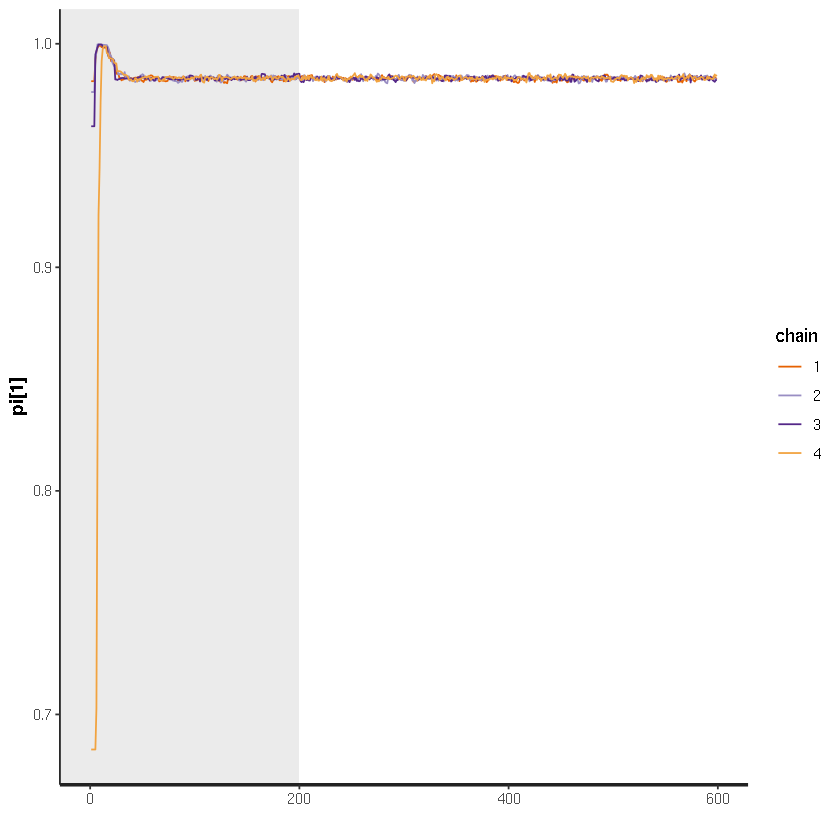

In [12]:
traceplot(fit1, pars=c("pi[1]"), inc_warmup=TRUE)

In [13]:
load("../../../data/dat_Testosterone.RData")

In [17]:
my_dat <- as.data.frame(dat$dat)
ls(my_dat)


# ok so writing this llfun is a little non-trivial but I think I can do it?
# mb the same way as the simulated data lol!



#    for (n in 1:N){

#       for (k in 1:K){
#           ps[k] = log(pi[k]) + multi_normal_lpdf(B[n] | zeros, SE_mat[n] + Sigmas[k]);
#       }
#       target += log_sum_exp(ps);
#     }

[1] "B.1"  "B.2"  "K"    "M"    "N"    "SE.1" "SE.2"

In [ ]:
fit1

# now I need to define something...

llfun_logistic <- function(data_i, draws) {
  x_i <- as.matrix(data_i[, which(grepl(colnames(data_i), pattern = "X")), drop=FALSE])
  logit_pred <- draws %*% t(x_i)
  dbinom(x = data_i$y, size = 1, prob = 1/(1 + exp(-logit_pred)), log = TRUE)
}